In [101]:
import pyfpgrowth
import matplotlib.pyplot as plt

In [102]:
DB_filepath = 'data/Transactions_LaLiga.txt'

transactions = list()
with open(DB_filepath, "r") as DB_file:
    for line in DB_file.readlines():
        transaction = line.split(' ')
        transaction[-1] = transaction[-1][:-1]  # Remove the \n of last item
        transactions.append(transaction)

print(f"{len(transactions)} transactions")

1955 transactions


In [103]:
support_threshold_percentage = 12.5
support_threshold = len(transactions) * (support_threshold_percentage / 100)
print(f"Threshold: {support_threshold_percentage:2.2f}% - {support_threshold}")

patterns = pyfpgrowth.find_frequent_patterns(transactions, support_threshold)

Threshold: 12.50% - 244.375


In [104]:
# Sort the dictionary
patterns_dic = {k: v for k, v in sorted(patterns.items(), key=lambda item: item[1], reverse=True)}

In [105]:
def print_ranking(patterns_dictionary: dict[tuple, int]) -> None:
    print("Rank\tQuantity\tPattern")
    for i, k in enumerate(patterns_dictionary):
        print(f"  {i:2d}  \t    {patterns_dictionary[k]:4d}\t{str(k).replace(',)', ')')}")

print_ranking(patterns_dic)

Rank	Quantity	Pattern
   0  	    1445	('MoreOnTargetShots')
   1  	    1161	('MoreShots')
   2  	    1043	('MoreOnTargetShots', 'MoreShots')
   3  	     832	('MoreOnTargetShots', 'Possession')
   4  	     783	('MoreAerials', 'MoreOnTargetShots')
   5  	     775	('MoreShots', 'Possession')
   6  	     701	('MoreOnTargetShots', 'MoreShots', 'Possession')
   7  	     654	('MoreAerials', 'MoreShots')
   8  	     584	('MoreAerials', 'MoreOnTargetShots', 'MoreShots')
   9  	     557	('LessOffTargetShots', 'MoreOnTargetShots')
  10  	     522	('LessFouls', 'MoreOnTargetShots')
  11  	     473	('LessFouls', 'Possession')
  12  	     472	('HighAccuracyPass', 'Possession')
  13  	     470	('MoreAerials', 'MoreOnTargetShots', 'Possession')
  14  	     446	('MoreAerials', 'MoreShots', 'Possession')
  15  	     438	('HighAccuracyPass', 'MoreOnTargetShots')
  16  	     433	('LessOffTargetShots', 'MoreAerials')
  17  	     416	('HighAccuracyPass', 'MoreOnTargetShots', 'Possession')
  18  	     405	('

In [106]:
def calculate_occurrences(patterns_dictionary: dict[tuple, int]) -> dict[int, int]:
    occurrences = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    for k, v in patterns_dictionary.items():
        occurrences[len(k)] += 1

    return occurrences

print(calculate_occurrences(patterns_dic))

{1: 2, 2: 18, 3: 20, 4: 3, 5: 0}


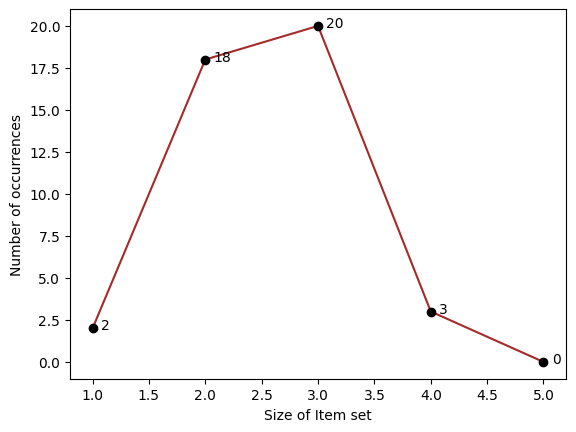

In [107]:
def plot_occurrences(occurrences: dict[int, int]):
    x = list(occurrences.keys())
    y = list(occurrences.values())

    fig = plt.figure()
    ax = fig.add_subplot()
    plt.plot(x, y, "brown")
    for i in range(len(x)):
        plt.plot(x[i], y[i], c="black", marker='o')
        ax.annotate(str(y[i]), xy=(x[i] + 0.075, y[i] - 0.075))

    plt.xlabel("Size of Item set")
    plt.ylabel("Number of occurrences")
    plt.show()
    
plot_occurrences(calculate_occurrences(patterns_dic))

Patterns with chance at least 10% bigger than random
Total:  28 



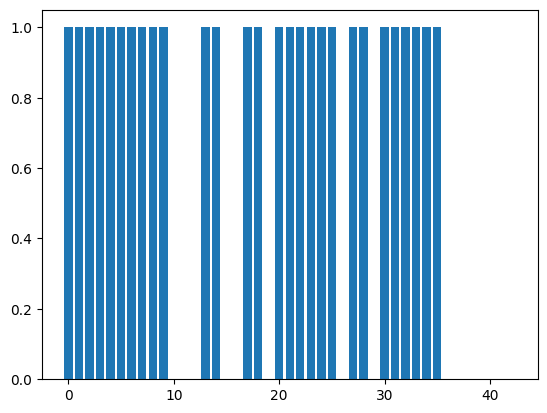

In [108]:
print("Patterns with chance at least 10% bigger than random")
x = range(len(patterns_dic.keys()))
y = [(patterns_dic[k] / len(transactions)) > (1.1 / pow(2, len(k))) for k in patterns_dic]
print("Total: ", y.count(True), "\n")
plt.bar(x, y)
plt.show()

In [109]:
# Remove the patterns with less than 1.1x the randon chance
for index, pattern in enumerate(patterns_dic):
    if not y[index]:
        del patterns[pattern]

In [110]:
# Sort the dictionary
patterns_dic = {k: v for k, v in sorted(patterns.items(), key=lambda item: item[1], reverse=True)}

print_ranking(patterns_dic)

Rank	Quantity	Pattern
   0  	    1445	('MoreOnTargetShots')
   1  	    1161	('MoreShots')
   2  	    1043	('MoreOnTargetShots', 'MoreShots')
   3  	     832	('MoreOnTargetShots', 'Possession')
   4  	     783	('MoreAerials', 'MoreOnTargetShots')
   5  	     775	('MoreShots', 'Possession')
   6  	     701	('MoreOnTargetShots', 'MoreShots', 'Possession')
   7  	     654	('MoreAerials', 'MoreShots')
   8  	     584	('MoreAerials', 'MoreOnTargetShots', 'MoreShots')
   9  	     557	('LessOffTargetShots', 'MoreOnTargetShots')
  10  	     470	('MoreAerials', 'MoreOnTargetShots', 'Possession')
  11  	     446	('MoreAerials', 'MoreShots', 'Possession')
  12  	     416	('HighAccuracyPass', 'MoreOnTargetShots', 'Possession')
  13  	     405	('LessFouls', 'MoreOnTargetShots', 'MoreShots')
  14  	     404	('MoreAerials', 'MoreOnTargetShots', 'MoreShots', 'Possession')
  15  	     401	('HighAccuracyPass', 'MoreShots', 'Possession')
  16  	     391	('HighAccuracyPass', 'MoreOnTargetShots', 'MoreShots

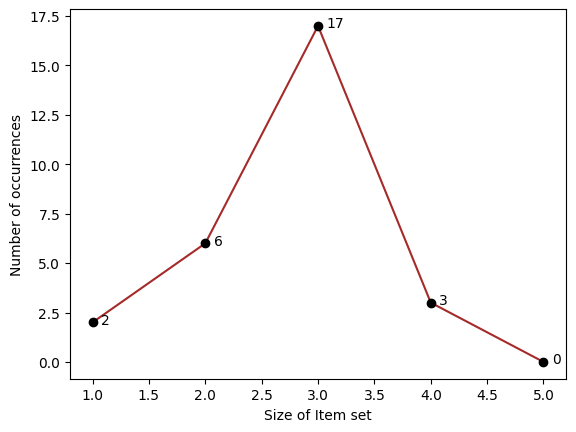

In [111]:
plot_occurrences(calculate_occurrences(patterns_dic))

In [112]:
confidence_threshold = 0.6
print(f"Threshold: {(confidence_threshold * 100)}%")
rules = pyfpgrowth.generate_association_rules(patterns, confidence_threshold)

Threshold: 60.0%


In [117]:
# Sort the dictionary
rules_dic = {k: v for k, v in sorted(rules.items(), key=lambda item: item[1][1], reverse=True)}
for k in rules_dic:
    percentage = rules_dic[k][1] * 100
    print(f"{percentage:2.2f}: {str(k)} -> {rules_dic[k][0][0]}")

95.91: ('HighAccuracyPass', 'MoreOnTargetShots', 'MoreShots') -> Possession
93.52: ('HighAccuracyPass', 'MoreShots', 'Possession') -> MoreOnTargetShots
90.58: ('MoreAerials', 'MoreShots', 'Possession') -> MoreOnTargetShots
90.45: ('MoreShots', 'Possession') -> MoreOnTargetShots
90.14: ('HighAccuracyPass', 'MoreOnTargetShots', 'Possession') -> MoreShots
89.84: ('MoreShots',) -> MoreOnTargetShots
89.65: ('LessFouls', 'MoreShots', 'Possession') -> MoreOnTargetShots
89.30: ('MoreAerials', 'MoreShots') -> MoreOnTargetShots
85.96: ('MoreAerials', 'MoreOnTargetShots', 'Possession') -> MoreShots
84.58: ('LessFouls', 'MoreOnTargetShots', 'Possession') -> MoreShots
84.25: ('MoreOnTargetShots', 'Possession') -> MoreShots
81.23: ('LessFouls', 'MoreOnTargetShots', 'MoreShots') -> Possession
74.58: ('MoreAerials', 'MoreOnTargetShots') -> MoreShots
72.18: ('MoreOnTargetShots',) -> MoreShots
69.18: ('MoreAerials', 'MoreOnTargetShots', 'MoreShots') -> Possession
67.21: ('MoreOnTargetShots', 'MoreShots'

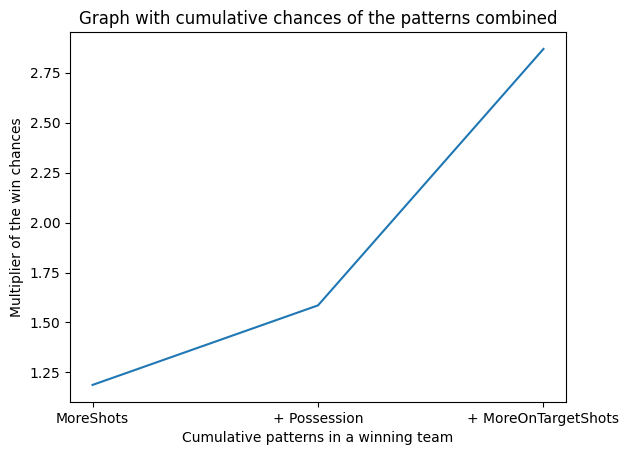

In [118]:
# Numbers of the dictionary (items 1, 5 e 7)
y = list()
for index, value in enumerate([1161, 775, 701]):
    y.append(value / (len(transactions) / 2 ** (index + 1)))
x = ["MoreShots", "+ Possession", "+ MoreOnTargetShots"]
plt.plot(x, y)
plt.title("Graph with cumulative chances of the patterns combined")
plt.ylabel("Multiplier of the win chances")
plt.xlabel("Cumulative patterns in a winning team")
plt.show()